In [159]:
import cv2
import os
import numpy as np
from IPython.display import display, Image

In [160]:
video = cv2.VideoCapture("video.mp4")
total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"Total number of frames: {total_frames}")

Total number of frames: 149


In [161]:
divisor = total_frames // 30
divisor

4

In [162]:
count = 1
for i in range(total_frames):
    success, image = video.read()
    if i % divisor != 0:
        continue
    cv2.imwrite(f"frames/frame{count}.jpg", image)
    count += 1
    if count > 30:
        break

In [163]:
input_folder = "frames"
target_width = 600
target_height = 400
images = []

for filename in os.listdir(input_folder):
    if filename.endswith(".jpg"):
        image_path = os.path.join(input_folder, filename)
        original_image = cv2.imread(image_path)
        resized_image = cv2.resize(original_image, (target_width, target_height))
        grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
        images.append(grayscale_image.flatten())       

In [164]:
H = np.array(images)
H = H.T
H.shape

(240000, 30)

In [165]:
column_means = np.mean(H, axis=0)
A = H - column_means

In [166]:
eigenvalues, eigenvectors = np.linalg.eig(A.T @ A)

In [167]:
max_eigenvalue_index = np.argmax(eigenvalues)
max_eigenvalue = eigenvalues[max_eigenvalue_index]
max_eigenvector = eigenvectors[:, max_eigenvalue_index]
print(f"Max eigenvalue of A.T @ A (and A @ A.T): {max_eigenvalue}")
print(f"Max eigenvector of A.T @ A: {max_eigenvector}")
max_eigenvector = A @ max_eigenvector
print(f"Max eigenvector of A @ A.T: {max_eigenvector}")

Max eigenvalue of A.T @ A (and A @ A.T): 14654505142.105373
Max eigenvector of A.T @ A: [0.18886707 0.17590346 0.19489449 0.14965166 0.19263293 0.18107731
 0.18279783 0.1757087  0.17820644 0.1876552  0.17860695 0.17775397
 0.18271495 0.1902174  0.17688351 0.1794786  0.1911769  0.18577706
 0.18264859 0.18137926 0.17962251 0.19524758 0.16499484 0.19091762
 0.19194286 0.19273733 0.19050421 0.18555358 0.18856057 0.15375246]
Max eigenvector of A @ A.T: [-722.76869452 -715.28012816 -639.57715564 ... -586.73172393 -679.19288553
 -726.31826539]


In [168]:
min_eigenvalue_index = np.argmin(eigenvalues)
min_eigenvalue = eigenvalues[min_eigenvalue_index]
min_eigenvector = eigenvectors[:, min_eigenvalue_index]
print(f"Min eigenvalue of A.T @ A (and A @ A.T): {min_eigenvalue}")
print(f"Min eigenvector of A.T @ A: {min_eigenvector}")
min_eigenvector = A @ min_eigenvector
print(f"Min eigenvector of A @ A.T: {min_eigenvector}")

Min eigenvalue of A.T @ A (and A @ A.T): 130369.12055953708
Min eigenvector of A.T @ A: [ 5.09572925e-01  6.04829712e-04  2.34816486e-03  4.23011151e-04
 -1.90165617e-01  9.55053199e-03 -2.04369733e-02  8.49178702e-02
 -1.56377465e-01 -4.05811751e-01  3.37763417e-04 -8.73926432e-02
  1.59575107e-01  3.87005419e-01 -1.70177939e-04  7.60744222e-03
 -4.85010589e-01 -1.63800818e-01  5.42834632e-03 -1.17063042e-02
  1.45381082e-01  2.00542679e-01 -2.76398133e-04 -1.02210797e-03
  1.29016936e-03  3.05857743e-03 -1.54599064e-02  2.29904998e-02
 -3.35092168e-03 -2.18076975e-04]
Min eigenvector of A @ A.T: [-0.07077421  0.20799664  0.55923302 ... -3.6144835  -0.92458758
 -0.08021485]


In [169]:
def convert_array_to_image(vector):
    flattened_array = np.array(vector, dtype=np.uint8)
    desired_size = (400, 600) 
    reshaped_image = flattened_array.reshape(desired_size)
    display(Image(data=cv2.imencode('.png', reshaped_image)[1].tobytes()))

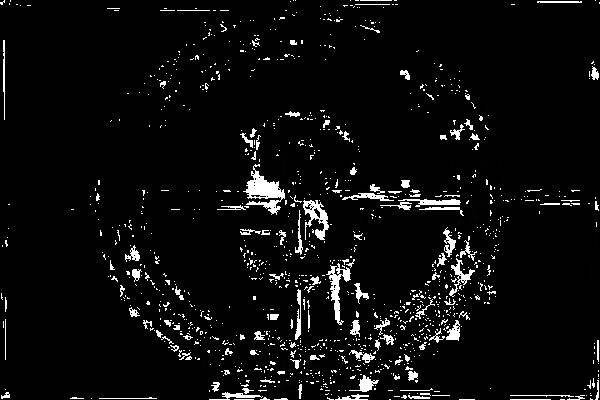

In [170]:
convert_array_to_image(min_eigenvector)

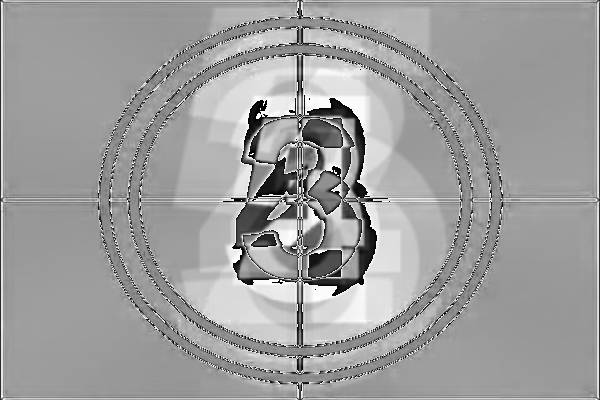

In [171]:
convert_array_to_image(max_eigenvector)